In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

#Import time library and the datetime module from the datetime 
import time
from datetime import datetime

In [2]:
# Creat ea set of random latitude and longitude combos
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)

# pack the lattitudes and longistudes as pairs by zipping them (connect them together)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add lats and longs to a list
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list to hold the cities
cities = []

#identify the enarest city for each lat and long combos
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, add it to the list
    if city not in cities:
        cities.append(city)
# Print the city count ot confirm sufficient count
len(cities)

633

In [6]:
#Build the URL with your weather api key
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url = url + "&q=" + city.replace(" ","+")
city_url

'https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0bd86ff88d27f7ec147a1dd84ca16dc6&q=jamestown'

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    city_url
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
    
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | samusu
City not found. Skipping...
Processing Record 3 of Set 1 | urdzhar
City not found. Skipping...
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | kurumkan
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | camalu
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | new plymouth
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | narsaq
Processing Record 15 of Set 1 | port shepstone
Processing Record 16 of Set 1 | capitao poco
Processing Record 17 of Set 1 | fortuna
Processing Record 18 of Set 1 | nome
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | muncar
Processing Record 21 of Set 1 | kyrnasivka
Processing Record 22 of Set 1 |

Processing Record 34 of Set 4 | lengshuijiang
Processing Record 35 of Set 4 | upernavik
Processing Record 36 of Set 4 | besikduzu
Processing Record 37 of Set 4 | isangel
Processing Record 38 of Set 4 | sao raimundo nonato
Processing Record 39 of Set 4 | ormara
Processing Record 40 of Set 4 | hasaki
Processing Record 41 of Set 4 | sorong
Processing Record 42 of Set 4 | ust-uda
Processing Record 43 of Set 4 | jiexiu
Processing Record 44 of Set 4 | tasiilaq
Processing Record 45 of Set 4 | hamilton
Processing Record 46 of Set 4 | saint-philippe
Processing Record 47 of Set 4 | laguna
Processing Record 48 of Set 4 | saskylakh
Processing Record 49 of Set 4 | grindavik
Processing Record 50 of Set 4 | homnabad
Processing Record 1 of Set 5 | coquimbo
Processing Record 2 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 3 of Set 5 | benguela
Processing Record 4 of Set 5 | arraial do cabo
Processing Record 5 of Set 5 | yaan
Processing Record 6 of Set 5 | guerrero negro
Processing Re

Processing Record 24 of Set 8 | amderma
City not found. Skipping...
Processing Record 25 of Set 8 | sehore
Processing Record 26 of Set 8 | zhanjiang
Processing Record 27 of Set 8 | korgen
Processing Record 28 of Set 8 | klaksvik
Processing Record 29 of Set 8 | georgetown
Processing Record 30 of Set 8 | biskamzha
Processing Record 31 of Set 8 | aksum
Processing Record 32 of Set 8 | nago
Processing Record 33 of Set 8 | rio grande
Processing Record 34 of Set 8 | flinders
Processing Record 35 of Set 8 | taunggyi
Processing Record 36 of Set 8 | broome
Processing Record 37 of Set 8 | esperance
Processing Record 38 of Set 8 | cururupu
Processing Record 39 of Set 8 | roebourne
Processing Record 40 of Set 8 | vardo
Processing Record 41 of Set 8 | hobyo
Processing Record 42 of Set 8 | itoman
Processing Record 43 of Set 8 | mponela
Processing Record 44 of Set 8 | laminusa
Processing Record 45 of Set 8 | tieli
Processing Record 46 of Set 8 | lolua
City not found. Skipping...
Processing Record 47 o

City not found. Skipping...
Processing Record 10 of Set 12 | pueblo nuevo
Processing Record 11 of Set 12 | turukhansk
Processing Record 12 of Set 12 | narrabri
Processing Record 13 of Set 12 | avera
Processing Record 14 of Set 12 | emerald
Processing Record 15 of Set 12 | qaqortoq
Processing Record 16 of Set 12 | lebu
Processing Record 17 of Set 12 | zhangjiakou
Processing Record 18 of Set 12 | aasiaat
Processing Record 19 of Set 12 | easton
Processing Record 20 of Set 12 | sept-iles
Processing Record 21 of Set 12 | kotido
Processing Record 22 of Set 12 | carutapera
Processing Record 23 of Set 12 | coffs harbour
Processing Record 24 of Set 12 | volot
Processing Record 25 of Set 12 | omboue
Processing Record 26 of Set 12 | baksheyevo
Processing Record 27 of Set 12 | taoudenni
Processing Record 28 of Set 12 | kavaratti
Processing Record 29 of Set 12 | hammerfest
Processing Record 30 of Set 12 | tambacounda
Processing Record 31 of Set 12 | santa maria del oro
Processing Record 32 of Set 1

In [8]:
# Convert the array of dictinaries above to a pandas DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,44.26,76,40,17.27,AR,2022-01-31 03:30:40
1,Busselton,-33.6500,115.3333,77.09,33,99,16.60,AU,2022-01-31 03:30:42
2,Khatanga,71.9667,102.5000,-7.10,99,98,7.49,RU,2022-01-31 03:30:43
3,Kurumkan,54.3000,110.3000,-8.43,95,99,1.45,RU,2022-01-31 03:30:43
4,Punta Arenas,-53.1500,-70.9167,48.31,66,40,13.80,CL,2022-01-31 03:28:29


In [9]:
#re assign columns:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-01-31 03:30:40,-54.8000,-68.3000,44.26,76,40,17.27
1,Busselton,AU,2022-01-31 03:30:42,-33.6500,115.3333,77.09,33,99,16.60
2,Khatanga,RU,2022-01-31 03:30:43,71.9667,102.5000,-7.10,99,98,7.49
3,Kurumkan,RU,2022-01-31 03:30:43,54.3000,110.3000,-8.43,95,99,1.45
4,Punta Arenas,CL,2022-01-31 03:28:29,-53.1500,-70.9167,48.31,66,40,13.80


In [10]:
# Add DF to a csv file 
output_data_file = "weather_data/cities.csv"

#Export the city_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

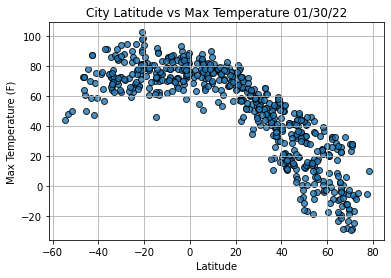

In [11]:
# extract relevant field froms the data frame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

#import time module
import time

#build the scatter plots for lat vs max temp
plt.scatter(lats, max_temps,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

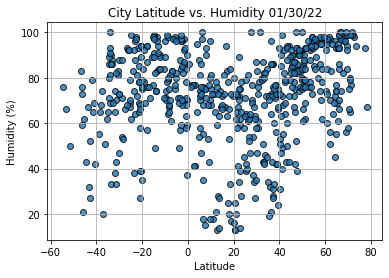

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

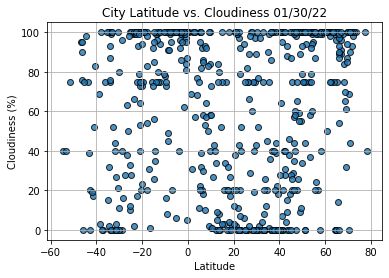

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

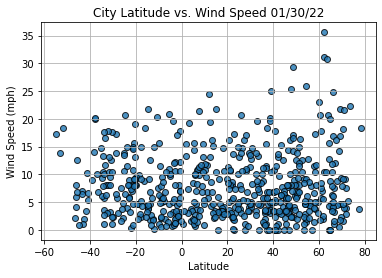

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
#Creating hemisphere dataframes
index13 = city_data_df.loc[13]

index13

City                 Capitao Poco
Country                        BR
Date          2022-01-31 03:30:50
Lat                       -1.7464
Lng                      -47.0594
Max Temp                    72.03
Humidity                       97
Cloudiness                    100
Wind Speed                   2.95
Name: 13, dtype: object

In [17]:
# return a DF with all the data fitting the criteria using loc example: latitudes greater than or equal to 0
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Khatanga,RU,2022-01-31 03:30:43,71.9667,102.5000,-7.10,99,98,7.49
3,Kurumkan,RU,2022-01-31 03:30:43,54.3000,110.3000,-8.43,95,99,1.45
5,Camalu,MX,2022-01-31 03:30:45,30.8500,-116.0667,56.50,78,2,8.21
6,Kapaa,US,2022-01-31 03:30:45,22.0752,-159.3190,78.78,67,0,8.05
10,Ilulissat,GL,2022-01-31 03:30:48,69.2167,-51.1000,-4.97,56,32,16.82


In [18]:
# Assing the dataframe to new variable 
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)].head()
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


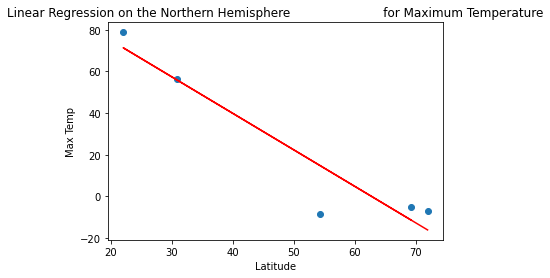

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature','Max Temp',(10,40))


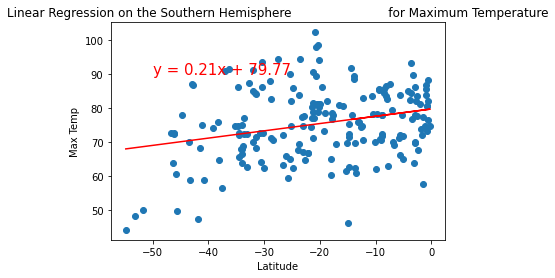

In [20]:

## Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

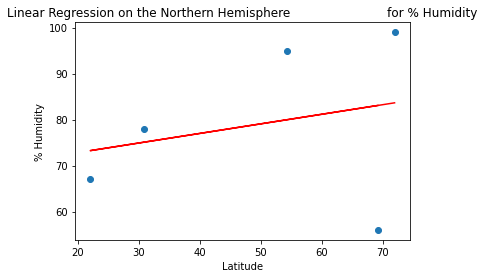

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,20))

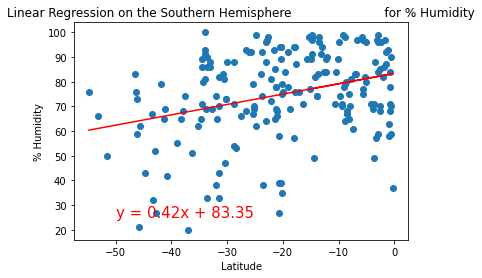

In [22]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \
                       for % Humidity','% Humidity',(-50,25))

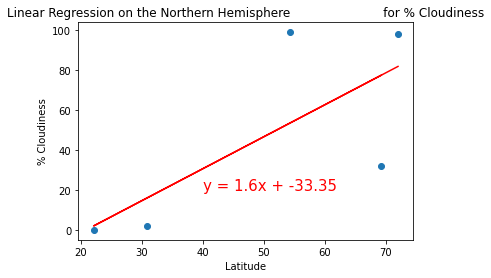

In [23]:
# Linear regression on the Northern Hemisphere percent of cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(40,20))

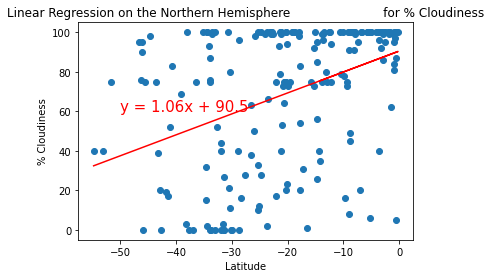

In [24]:
# Linear regression on the Southern Hemisphere percent of cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(-50,60))

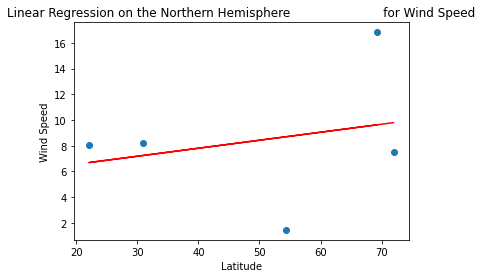

In [25]:
# Linear regression on the Northern Hemisphere for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Wind Speed', 'Wind Speed',(10,40))


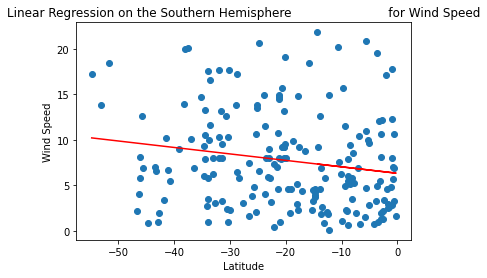

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
